### Please import the Boston housing dataset, do some EDA, and clean data. Then calculate linear regression. After that please use Polynomial Regression. Calculate RMSE and R squared for each. Please use sklearn to implement Linear Regression

In [1]:
# http://lib.stat.cmu.edu/datasets/boston

## Import packages

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Import the data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Understanding the data

In [4]:
f = open("columns.md", "r")
print(f.read())
f.close()

Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT    % lower status of the population
MEDV     Median value of owner-occupied homes in $1000's



Our goal is to predict the MEDV.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


Seems like the dataset is complete and all values are numeric.

## Visualization

/Users/flori/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


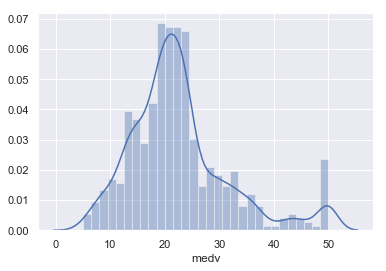

In [6]:
sns.distplot(df['medv'], bins=30)
plt.show()

We see the values of medv are distributed normally.

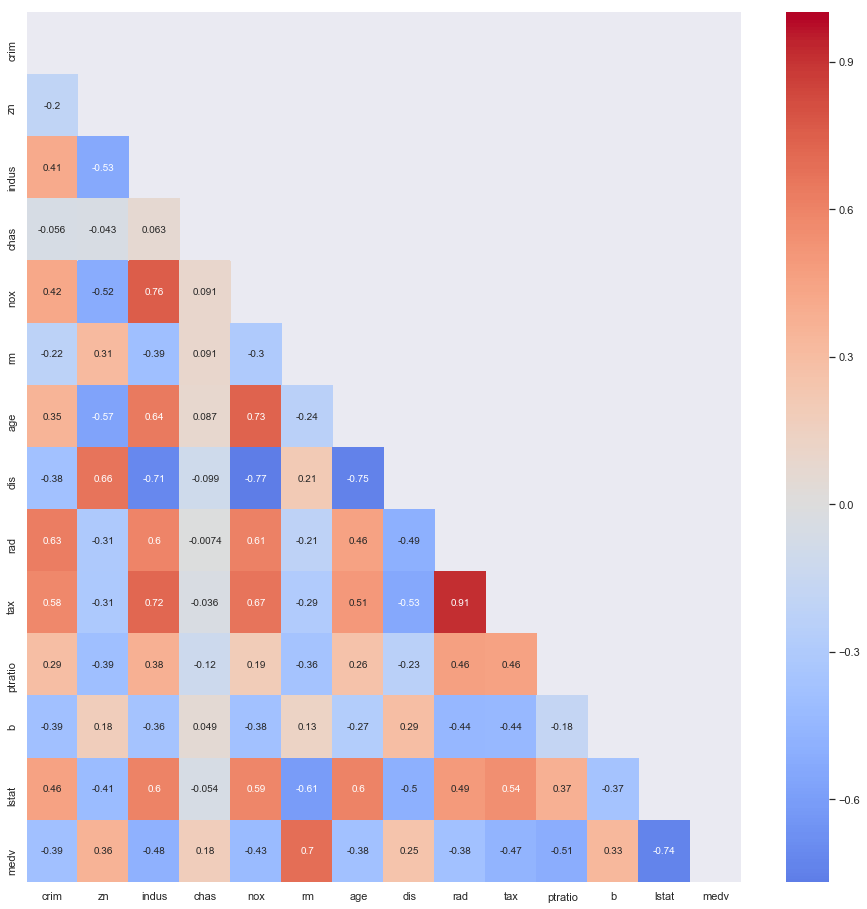

In [7]:
corr = df.corr()
f, ax = plt.subplots(figsize = (16,16))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, center = 0, cmap="coolwarm", annot=True, mask=mask);

Correlation with medv:
- rm 0.7
- zn 0.36
- b 0.33
- dis 0.25
- chas 0.18
- age -0.38
- rad -0.38
- crim -0.39
- nox -0.43
- tax -0.47
- indus -0.48
- ptratio -0.51
- lstat -0.74

plotting medv against lstat

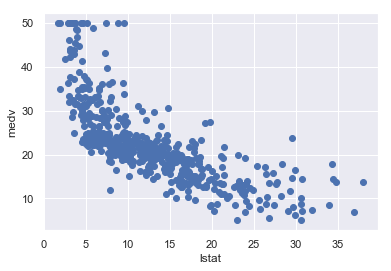

In [8]:
plt.scatter(x=df.lstat,y=df.medv)
plt.xlabel('lstat')
plt.ylabel('medv');

plotting medv against rm

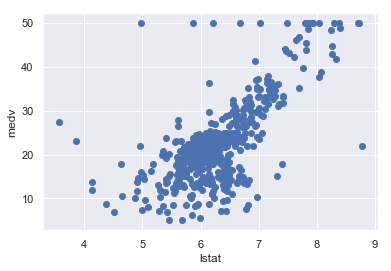

In [9]:
plt.scatter(x=df.rm,y=df.medv)
plt.xlabel('lstat')
plt.ylabel('medv');

plotting medv against ptratio

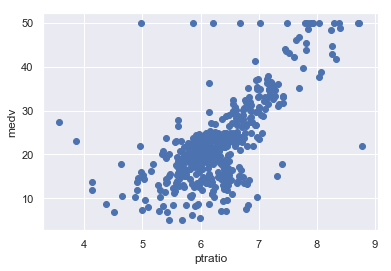

In [10]:
plt.scatter(x=df.rm,y=df.medv)
plt.xlabel('ptratio')
plt.ylabel('medv');

## Modelling

In [11]:
y = df.medv.values
df2 = df[['rm', 'lstat', 'ptratio']]
#df2 = df[['rm', 'lstat', 'ptratio', 'indus', 'tax']]

In [12]:
df2.head()

,rm,lstat,ptratio
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


Splitting dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=5)

In [14]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

## Linear regression

In [15]:
rmse_lin_train = np.sqrt(mean_squared_error(y_train,y_pred))
r2_lin_train = r2_score(y_train, y_pred)
rmse_lin_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
r2_lin_test = r2_score(y_test, y_pred_test)

In [16]:
print('RMSE_lin_train: ', rmse_lin_train)
print('r2_lin_train: ', r2_lin_train)
print('RMSE_lin_test: ', rmse_lin_test)
print('r2_lin_test: ', r2_lin_test)

RMSE_lin_train:  5.303863193307931
r2_lin_train:  0.6725214335656511
RMSE_lin_test:  4.913937534764078
r2_lin_test:  0.6915878280744177


# Polynomial regression with degree = 2

In [17]:
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)
regr2 = linear_model.LinearRegression()
regr2.fit(x_poly, y_train)
y_poly_pred = regr2.predict(x_poly)
y_poly_pred_test = regr2.predict(x_poly_test)

In [18]:
rmse_poly_train = np.sqrt(mean_squared_error(y_train,y_poly_pred))
r2_poly_train = r2_score(y_train, y_poly_pred)
print('RMSE_poly_train: ', rmse_poly_train)
print('r2_poly_train: ', r2_poly_train)
rmse_poly_test = np.sqrt(mean_squared_error(y_test,y_poly_pred_test))
r2_poly_test = r2_score(y_test, y_poly_pred_test)
print('RMSE_poly_test: ', rmse_poly_test)
print('r2_poly_test: ', r2_poly_test)

RMSE_poly_train:  4.257875295533862
r2_poly_train:  0.788950596485003
RMSE_poly_test:  3.7048620158385894
r2_poly_test:  0.8246861116515254


In [19]:
MSE_train = []
MSE_test = []
r2_train = []
r2_test = []
index = []

for i in range(1,25):
    polynomial_features = PolynomialFeatures(degree=i)
    x_poly = polynomial_features.fit_transform(X_train)
    x_poly_test = polynomial_features.fit_transform(X_test)
    regr2 = linear_model.LinearRegression()
    regr2.fit(x_poly, y_train)
    y_poly_pred = regr2.predict(x_poly)
    y_poly_pred_test = regr2.predict(x_poly_test)
    
    MSE_train.append(np.sqrt(mean_squared_error(y_train,y_poly_pred)))
    r2_train.append(r2_score(y_train, y_poly_pred))
    MSE_test.append(np.sqrt(mean_squared_error(y_test,y_poly_pred_test)))
    r2_test.append(r2_score(y_test, y_poly_pred_test))
    index.append(i)

## plotting the results

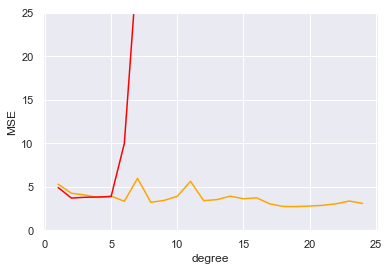

In [20]:
plt.plot(index, MSE_train, color = "orange")
plt.plot(index, MSE_test, color = 'red');
plt.ylim(0,25);
plt.xlabel('degree');
plt.ylabel('MSE');

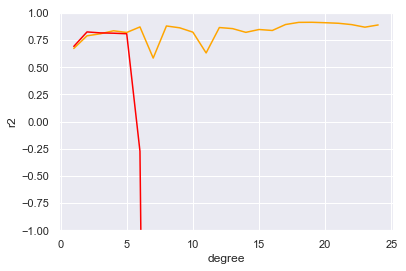

In [21]:
plt.plot(index, r2_train, color = "orange")
plt.plot(index, r2_test, color = 'red');
plt.ylim(-1,1);
plt.xlabel('degree');
plt.ylabel('r2');

## Takeaway
We see that the linear regression (degree = 1) is quite good. With the polynomial Regression we see that with the degree 2 we got an even better result. But afterwards the model starts to overfit. In the plots we see that the MSE goes down for the training data but for the test data it gets bigger if we increase the degree. The same with R-squared for the training data the model goes to 1 and for the test data our model gets pretty bad result below 0. 
- so a polynominal regression with a degree of 2 seems to be the optimum

## K-Fold Crossvalidation

In [24]:
from sklearn.model_selection import KFold

def polynomial_regression_Kfold(degree, K):
    "Creates a polynomial regression model for the given degree and performs K-fold CV"
  
    poly_features = PolynomialFeatures(degree=degree)
    kf = KFold(n_splits=K, random_state=0)
    rmse_train, r2_train = 0,0
    rmse_test, r2_test = 0,0
    
    for train_index, test_index in kf.split(X):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
    
        # transforms the existing features to higher degree features
        X_train_poly = poly_features.fit_transform(X_train)
  
        # fit the transformed features to Linear Regression
        poly_model = linear_model.LinearRegression()
        poly_model.fit(X_train_poly, Y_train)
  
        # predicting on training data-set
        y_train_predicted = poly_model.predict(X_train_poly)
  
        # predicting on test data-set
        y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
        # evaluating the model on training dataset
        rmse_train += np.sqrt(mean_squared_error(Y_train, y_train_predicted))/K
        r2_train += r2_score(Y_train, y_train_predicted)/K
  
        # evaluating the model on test dataset
        rmse_test += np.sqrt(mean_squared_error(Y_test, y_test_predict))/K
        r2_test += r2_score(Y_test, y_test_predict)/K
  
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {:.3f}".format(rmse_train))
    print("R2 score of training set is {:.3f}".format(r2_train))
    print("\n")
    print("The model performance for the test set")
    print("------------------------------------------")
    print("RMSE of test set is {:.3f}".format(rmse_test))
    print("R2 score of test set is {:.3f}".format(r2_test))

In [31]:
X = pd.DataFrame(np.c_[df['lstat'], df['rm']], columns = ['lstat','rm'])
y = df['medv']

polynomial_regression_Kfold(2, 10)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.485
R2 score of training set is 0.759


The model performance for the test set
------------------------------------------
RMSE of test set is 4.623
R2 score of test set is 0.372
